In [6]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [7]:
a = np.load('./sweeps/param_w_N_19_nsims_1_c_0.010000_deltaT_simulations.npz')
fn_out = './sweeps/param_w_N_19_i_10_j_10_c_0.010000_deltaT_simulation.npz'

In [3]:
a.keys()

['hs', 'wvals', 'vs', 'params', 'nsims']

In [4]:
vs = a['vs']

In [6]:
i = 10
j = 10
v = vs[i,j,0,0,:]

In [9]:
N = 10000
#Take different deltaT sizes
deltaT = [2, 5, 10, 25, 50]

v_out = np.zeros((N, len(deltaT)))

for idx, DT in enumerate(deltaT):
        v_r = v.reshape((-1, DT))
        v_out[:,idx] = np.max(v_r[0:N], 1)

In [10]:
#Save
np.save(fn_out, v_out)

In [11]:
#Generate N Gaussian pts
gauss = random.randn(N)

In [14]:
np.save('./sweeps/Gaussian_1000.npz', gauss)

## Compute optimal filter in R

In [2]:
#Then reimport
prespike = np.load('./optimal_filter_prespike.npy')
postspike = np.load('./optimal_filter_postspike.npy')

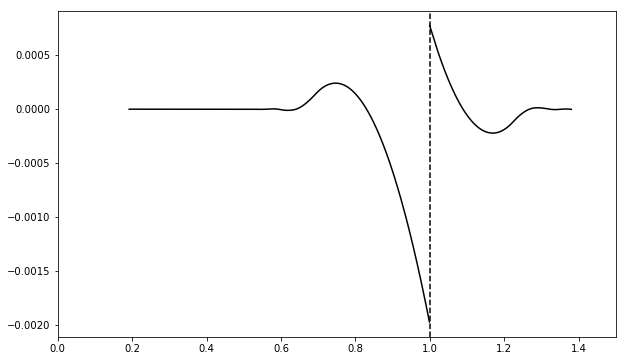

In [11]:
plt.plot(prespike[:,0], prespike[:,1], color=(0,0,0))
plt.plot(postspike[:,0], postspike[:,1], color=(0,0,0))
plt.axvline(x = 1, linestyle = '--', color = (0,0,0))
plt.xlim([0, 1.5])
plt.savefig('./fig_3.pdf')